In [1]:
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.models import Model
from keras.layers import Input, Dense, Activation
from keras.utils import np_utils

from pandas import read_csv
from sklearn.model_selection import train_test_split

Using Theano backend.


In [2]:
dataset = read_csv("../datasets/mnist_data/train.csv").values
X_train, X_test, y_train, y_test = train_test_split(dataset[:,1:], dataset[:,0], 
                                                   test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(33600, 784) (8400, 784) (33600,) (8400,)


In [3]:
X_train, X_test = X_train/255, X_test/255

In [74]:
embedding_n = 2
inp = Input(shape=(784,))
fc1 = Dense(embedding_n, activation='sigmoid')(inp)
out = Dense(784)(fc1)

autoencoder = Model(inputs=inp, outputs=out)
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 2)                 1570      
_________________________________________________________________
dense_22 (Dense)             (None, 784)               2352      
Total params: 3,922
Trainable params: 3,922
Non-trainable params: 0
_________________________________________________________________


In [75]:
autoencoder.layers

In [76]:
encoder = Model(inputs=inp, outputs=fc1)
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 2)                 1570      
Total params: 1,570
Trainable params: 1,570
Non-trainable params: 0
_________________________________________________________________


In [77]:
decoder_inp = Input(shape=(embedding_n,))
decoder_out = autoencoder.layers[-1](decoder_inp)
decoder = Model(inputs=decoder_inp, outputs=decoder_out)
decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        (None, 2)                 0         
_________________________________________________________________
dense_22 (Dense)             (None, 784)               2352      
Total params: 2,352
Trainable params: 2,352
Non-trainable params: 0
_________________________________________________________________


In [78]:
autoencoder.compile(loss='mse', optimizer='adagrad', metrics=['accuracy'])

In [79]:
hist = autoencoder.fit(X_train, X_train, 
                       epochs=10, 
                       shuffle=True,
                       batch_size=256,
                       validation_data=(X_test, X_test)
                      )

Train on 33600 samples, validate on 8400 samples
Epoch 1/10
33600/33600 [==============================] - 1s 21us/step - loss: 0.0726 - acc: 0.0163 - val_loss: 0.0669 - val_acc: 0.0082
Epoch 2/10
33600/33600 [==============================] - 1s 21us/step - loss: 0.0659 - acc: 0.0070 - val_loss: 0.0656 - val_acc: 0.0060
Epoch 3/10
33600/33600 [==============================] - 1s 21us/step - loss: 0.0649 - acc: 0.0049 - val_loss: 0.0647 - val_acc: 0.0062
Epoch 4/10
33600/33600 [==============================] - 1s 21us/step - loss: 0.0639 - acc: 0.0065 - val_loss: 0.0637 - val_acc: 0.0073
Epoch 5/10
33600/33600 [==============================] - 1s 21us/step - loss: 0.0630 - acc: 0.0083 - val_loss: 0.0628 - val_acc: 0.0136
Epoch 6/10
33600/33600 [==============================] - 1s 21us/step - loss: 0.0622 - acc: 0.0146 - val_loss: 0.0622 - val_acc: 0.0148
Epoch 7/10
33600/33600 [==============================] - 1s 21us/step - loss: 0.0616 - acc: 0.0162 - val_loss: 0.0617 - val_acc:

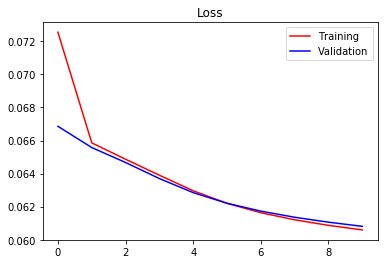

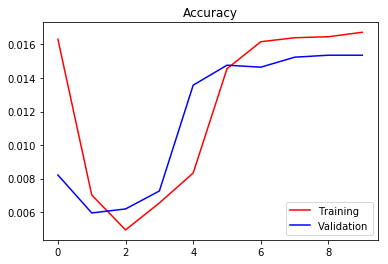

In [80]:
plt.figure(0)
plt.title("Loss")
plt.plot(hist.history['loss'], 'r', label='Training')
plt.plot(hist.history['val_loss'], 'b', label='Validation')
plt.legend()
plt.show()

plt.figure(1)
plt.title("Accuracy")
plt.plot(hist.history['acc'], 'r', label='Training')
plt.plot(hist.history['val_acc'], 'b', label='Validation')
plt.legend()
plt.show()

In [81]:
test = X_train[:20]
print(test.shape)
encodings = encoder.predict(test)
print(encodings.shape)
decodings = decoder.predict(encodings)
print(decodings.shape)

(20, 784)
(20, 2)
(20, 784)


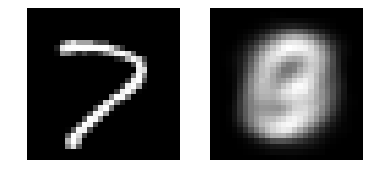

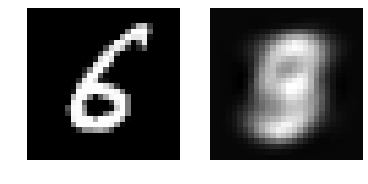

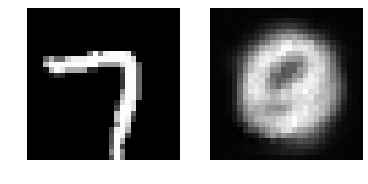

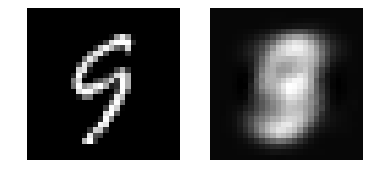

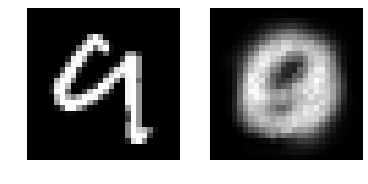

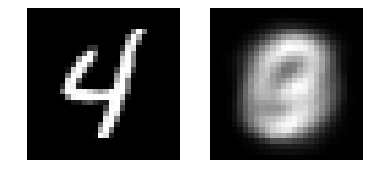

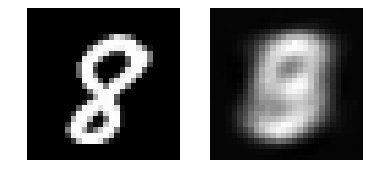

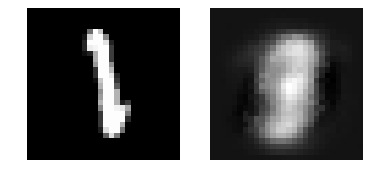

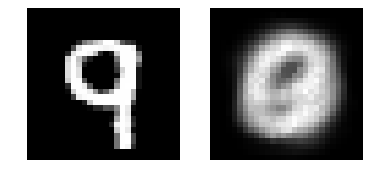

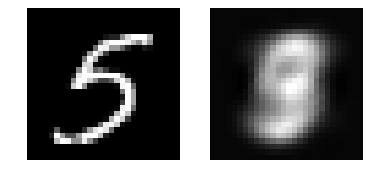

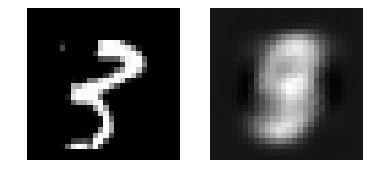

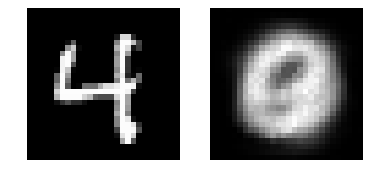

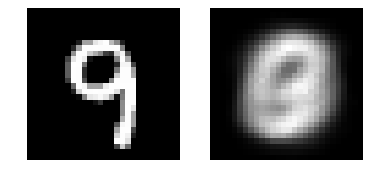

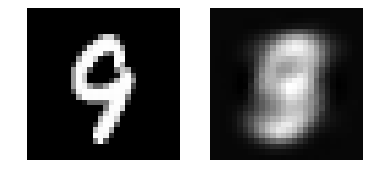

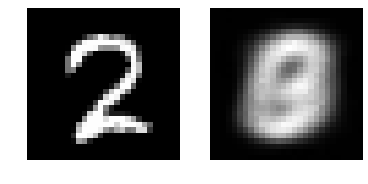

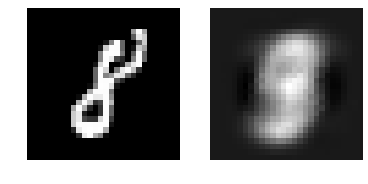

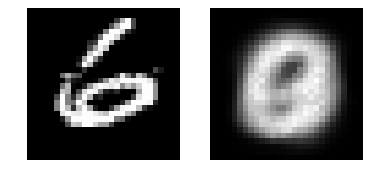

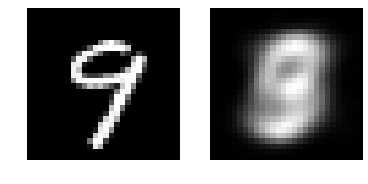

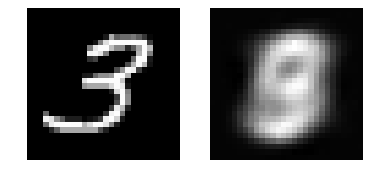

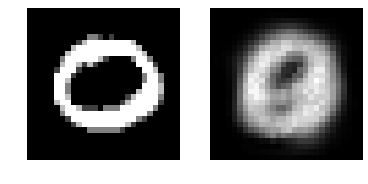

In [82]:
for i in range(test.shape[0]):
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(test[i].reshape(28,28), cmap='gray')
    plt.axis("off")
    plt.subplot(1,2,2)
    plt.imshow(decodings[i].reshape(28,28), cmap='gray')
    plt.axis("off")

(33600, 2)


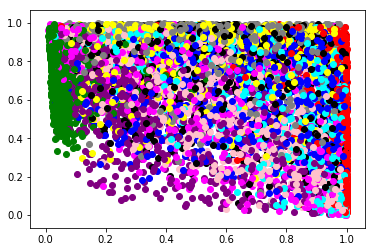

In [83]:
preds = encoder.predict(X_train)
print(preds.shape)
colors = ['red', 'green', 'blue', 'yellow', 'pink', 'black', 'cyan', 'purple', 'gray', 'magenta']

plt.figure()
for i in range(10000):
    plt.scatter(preds[i,0], preds[i,1], color=colors[y_train[i]])
plt.show()